In [ ]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

#### 1. Prepare the data

In [ ]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격 (in $1,000s)
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


#### 2. Build the model

In [ ]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b 

#### 3. Set the criterion

In [ ]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

#### 4. Train the model

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # tf.Variables 초기화

    for step in range(10000):
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
            print('loss {}'.format(sess.run(loss)))
            print()

    w_out, b_out = sess.run([w, b]) 

Step 0: w [1.3367336] b [-0.8356929]
loss 346.2901916503906

Step 1000: w [0.36397386] b [12.667031]
loss 154.0311279296875

Step 2000: w [-0.13761021] b [21.021584]
loss 82.65410614013672

Step 3000: w [-0.4477306] b [26.187054]
loss 55.368526458740234

Step 4000: w [-0.639473] b [29.380777]
loss 44.937923431396484

Step 5000: w [-0.75802594] b [31.355434]
loss 40.95051574707031

Step 6000: w [-0.8313239] b [32.57631]
loss 39.42625427246094

Step 7000: w [-0.8766434] b [33.331165]
loss 38.843563079833984

Step 8000: w [-0.90466315] b [33.79787]
loss 38.620819091796875

Step 9000: w [-0.92198706] b [34.086426]
loss 38.535667419433594



#### 5. Visualize trained model

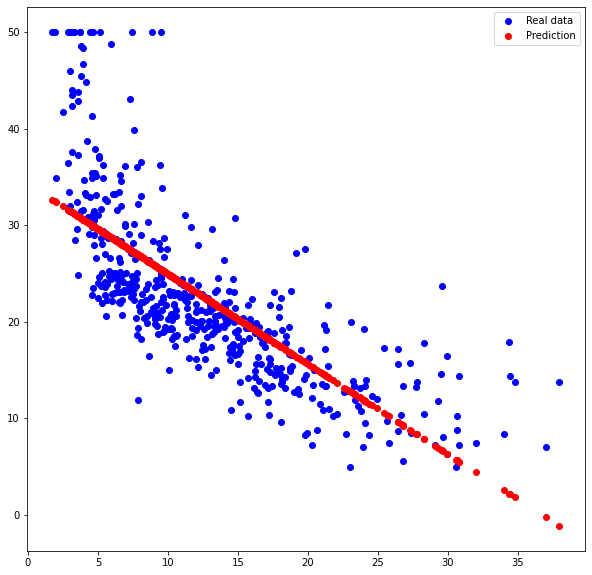

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(x_data, y_data, 'bo', label='Real data')
plt.plot(x_data, x_data * w_out + b_out, 'ro', label='Prediction')
plt.legend()
plt.show()

#### + Appendix. Gradient Descent 단계마다 Trained model 그리기(Plotting)

In [ ]:
# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer()) 

#     for step in range(10000):
#         sess.run(train)
#         if step % 1000 == 0:
#             print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b)))
#             print('loss {}'.format(sess.run(loss)))
            
#             plt.figure(figsize = (10,10))
#             plt.plot(x_data, y_data, 'bo', label='Real data')
#             plt.plot(x_data, x_data * sess.run(w) + sess.run(b), 'ro', label='Prediction')
#             plt.legend()
#             plt.show()
#             print()

#     w_out, b_out = sess.run([w, b]) 